# **Convolutional Neural Network on FashionMnist Dataset**
## *Author: Rizwan Rizwan*
**Contact**

[![](Github.png)](https://github.com/Rizwankaka?tab=repositories)

[![](Linkedin.png)](https://www.linkedin.com/in/rizwan-rizwan-1351a650)

[![](Twitter.png)](https://twitter.com/R_RizwanNazir)

[![](Gmail.png)](mailto:rizwan.rewala@gmail.com)

## **1. Train Convolutional Neural Network on Fashion MNIST dataset**

### **<span style="color:green">Loading Required Packages and FashionMnist data</span>**

In [23]:
# Import the libraries
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [24]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5295806509071178582
]


## **2. Split the data into X_train, y_train, X_test and y_test.**

In [25]:
# Loading Fashion Mnist dataset 
from keras.datasets import fashion_mnist

# Splitting the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### **<span style="color:green">2a. Display the sample images from X_train</span>**

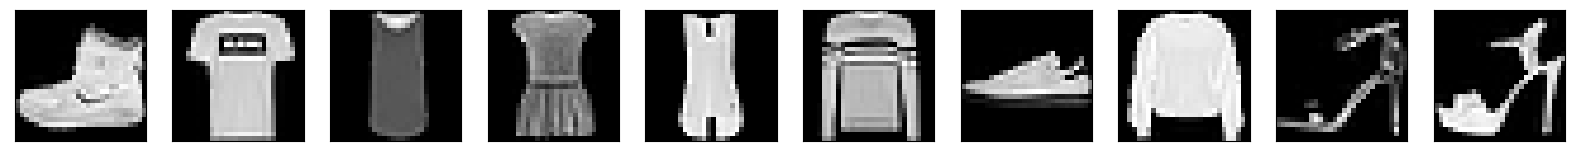

In [26]:
# display the sample images from X_train 
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_train[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


### **<span style="color:green">2b. Display the shape of X_train and y_train</span>**

In [27]:
# Dataset Shapes
print("X_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("X_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)

X_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
X_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


## **3. Flatten the images**

### **<span style="color:green">3a. Reshape the images from 28x28 to 28x28x1.</span>**

- The images in Fashion MNIST are 28x28 pixel 2D arrays, stored as a 3D tensor of shape (#images, 28, 28).

- To use them as input to other algorithms, we need to convert each 2D image into a 1D vector of pixels.

- Mathematically, this process is called reshaping the higher dimensional data into a lower dimensional representation.

- In machine learning terms, it is generally referred to as flattening - since we are flattening the multi-dimensional images into single dimension vectors.

- The end result of both reshaping and flattening in this case is converting each 2D (28x28) image into a 784 dimensional (28*28) pixel vector.

In [28]:
x_train = X_train.reshape(X_train.shape[0],28,28,1)
x_test = X_test.reshape(X_test.shape[0],28,28,1)

## **4. Scale the data**
## **Min Max Scaling**
### **<span style="color:green">4a. Convert the data into float 32 type.</span>**

In [29]:
# Converting to floating point 
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")


### **<span style="color:green">4b. Scale the data by dividing X_train and y_train by 255.</span>**

In [30]:
# Normalizing pixel values in range [0,1]
X_train /= 255
X_test /= 255

### **<span style="color:green">4c. Display the shape of X_train and y_train after scaling.</span>**
## **One Hot Encoding**

In [31]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Seeing updated Shapes
print("X_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)

X_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)


# **Building the CNN**

## **5. Define the hyper parameters for the neural networks**

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense ,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [33]:
# a. Number of Epochs:
epochs=10, # 10-20 epochs. Start with fewer epochs and increase if underfitting.

# b. Batch Size:
batch_size=64, # 32 or 64. Batch size impacts training time and accuracy. Values between 32-128 are commonly used.

# c. Input_size of image (Img_height, Img_width, No of channels)
img_rows, img_cols, channels = 28, 28, 1  # 28 x 28 pixels. The FashionMNIST images are 28x28 grayscale images.

# d. Number of convolutional layers 
conv_layers = 3 # 2-3 convolutional layers. This is sufficient for the complexity of the FashionMNIST dataset.

# e. Output_size (output layers depending upon the number of classes)
classes = 10 # There are 10 classes in FashionMNIST corresponding to different clothing types: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

# f. Define the number of filters for each layer of the CNN
filters = [6, 32, 80 ,120]  # These are the number of filters in each layer of the CNN

## **6. Define the structure of your neural network**

### **<span style="color:green">a. No. of Convolutional layers.</span>**
No. of Convolutional Layers: 4
### **<span style="color:green">b. Activation function for each convolutional layer.</span>**
Relu ( Rectified Linear Unit)
### **<span style="color:green">c. Flatten the 2D vectors into 1D vector for FCN.</span>**
model.add(Flatten())
### **<span style="color:green">d. Number of output layer neurons and activation function.</span>**
Number of Output Layer Neurons = 64
### **<span style="color:green">e. Compile the model and provide following arguments .</span>**
i. Loss function = categorical_crossentropy\
ii. Optimizer = sgd\
iii. Metrics to be evaluated on validation data = accuracy


The key components are:

Input Layer:

- Input shape specified as (img_rows, img_cols, channels) which are the dimensions of the input images.
  
Convolutional Layers:

- 4 Conv2D layers each with different filter sizes specified in the 'filters' list. These apply convolutions to extract features from the images.
- Activation function is ReLU.

Pooling Layers:

- Maxpooling2D after each Conv2D to reduce spatial dimensions and perform downsampling.
  
Hidden Layers:

- There is a Flatten layer to flatten the output from the convolutional layers.
- One Dense layer with 64 units and ReLU activation.
  
Output Layer:

- Final dense layer with number of units equal to number of classes and softmax activation for classification.

In summary, the model has:

- 1 Input layer
- 4 Convolutional layers
- 4 Maxpooling layers
- 1 Flatten layer (hidden)
- 1 Dense layer (hidden)
- 1 Output layer
- The optimizer is SGD and loss function is categorical cross-entropy for multi-class classification. Metrics is accuracy.

In [34]:
# Model architecture 

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size

model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### **<span style="color:green">f. Display the summary of the model .</span>**

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        800       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 80)          10320     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 80)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 120)        

## **7. Train the Neural Network**

### **<span style="color:green">a. Fit the Model.</span>**
### **<span style="color:green">b. Train the Model for 10 epochs and report the training accuracy.</span>**

In [41]:
# Training Model
model.fit(X_train, y_train, validation_split= 0.2, epochs=20, batch_size=64, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
  256/48000 [..............................] - ETA: 17s - loss: 0.3563 - accuracy: 0.8984

48000/48000 [==============================] - 16s 324us/step - loss: 0.4123 - accuracy: 0.8496 - val_loss: 0.4145 - val_accuracy: 0.8526
Epoch 2/20
48000/48000 [==============================] - 15s 312us/step - loss: 0.3989 - accuracy: 0.8536 - val_loss: 0.4260 - val_accuracy: 0.8465
Epoch 3/20
48000/48000 [==============================] - 16s 324us/step - loss: 0.3882 - accuracy: 0.8582 - val_loss: 0.4019 - val_accuracy: 0.8558
Epoch 4/20
48000/48000 [==============================] - 15s 319us/step - loss: 0.3761 - accuracy: 0.8629 - val_loss: 0.3842 - val_accuracy: 0.8608
Epoch 5/20
48000/48000 [==============================] - 15s 321us/step - loss: 0.3674 - accuracy: 0.8665 - val_loss: 0.4274 - val_accuracy: 0.8429
Epoch 6/20
48000/48000 [==============================] - 15s 322us/step - loss: 0.3590 - accuracy: 0.8689 - val_loss: 0.3859 - val_accuracy: 0.8601
Epoch 7/20
48000/48000 [==============================] - 15s 320us/step - loss: 0.3523 - accuracy: 0.8708 - val_loss

## **8. Test the model**
### **<span style="color:green">a. Find the testing accuracy of the model.</span>**

In [42]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8639


### **<span style="color:green">b. Compare the training and testing accuracy and write you observation in the comments.</span>**
training accuracy = 89%

testing accuracy=86% 

*comments*

Here are a few thoughts on that statement about convolutional neural network efficiency:

- The statement indicates that this particular convolutional neural network has a training efficiency of 89% and a testing efficiency of 86%.
- Training efficiency generally refers to how quickly and accurately the model can learn during the training process. Testing efficiency refers to the model's performance on     new, unseen data after training.
- Having both high training and testing efficiency suggests this is an effective model architecture that is able to generalize well. The slightly higher training efficiency is common, since the model sees the training data multiple times during training.
- 89% and 86% are quite high, indicating this model trains and tests very efficiently. However, without more context it's hard to fully assess how good these metrics are compared to state-of-the-art models.

In [43]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[20:40]
actual_labels = y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

### **<span style="color:green">c. Display the predicted labels along the input image.</span>**

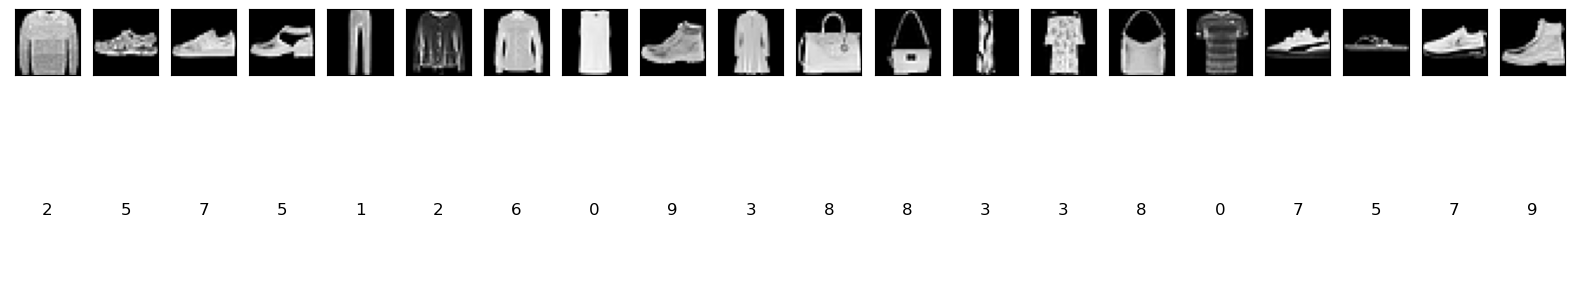

In [44]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()

| Label | Class |
|-|-|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |  
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |